In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])
                             ])
#Loading training set
trainset=datasets.FashionMNIST('Fashion-MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
#loading test set
testset=datasets.FashionMNIST('Fashion-MNIST_data/',download=True,train=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [3]:
dataiter=iter(trainloader)
images , labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


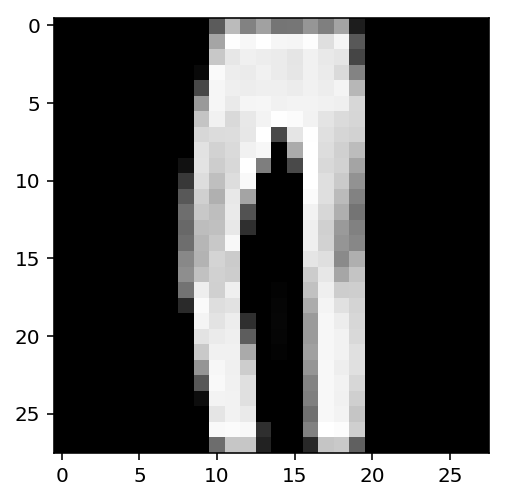

In [4]:
plt.imshow(images[0].numpy().squeeze(),cmap='Greys_r')

In [5]:
from torch import nn
import torch.nn.functional as F
from torchvision import datasets , transforms
from torch import optim

In [29]:
inputs=images.view(images.shape[0],-1)
model=nn.Sequential(nn.Linear(784,256),
                    nn.Dropout(p=0.2),
                    nn.ReLU(),
                    nn.Linear(256,128),
                    nn.Dropout(p=0.2),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.Dropout(p=0.2),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax())
criterion = nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)
logits=model(inputs)
loss=criterion(logits,labels)
print(loss)

tensor(2.2823, grad_fn=<NllLossBackward>)


In [30]:
epochs=30
train_losses , test_losses=[], []
for i in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        images=images.view(images.shape[0],-1)#flattening_images
        optimizer.zero_grad() #cleaning_optimizer
        output=model.forward(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    test_loss=0
    accuracy=0
    with torch.no_grad():
        model.eval()
        for images,labels in testloader:
            images=images.view(images.shape[0],-1)
            log_ps=model(images)
            test_loss+=criterion(log_ps,labels)
            ps=torch.exp(log_ps)
            top_p,top_class=ps.topk(1,dim=1)
            equals=top_class == labels.view(*top_class.shape)
            accuracy+=torch.mean(equals.type(torch.FloatTensor))
    model.train()        
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    
    print("Epoch:{}/{}..".format(i+1,epochs),
          "Training loss:{:.3f}..".format (running_loss/len(trainloader)),
          "Test Loss:{:.3f}..".format(test_loss/len(testloader)),
          "Test Accuracy:{:.3f}..".format(accuracy/len(testloader)))

Epoch:1/30.. Training loss:0.607.. Test Loss:0.462.. Test Accuracy:0.831..
Epoch:2/30.. Training loss:0.480.. Test Loss:0.420.. Test Accuracy:0.848..
Epoch:3/30.. Training loss:0.449.. Test Loss:0.436.. Test Accuracy:0.848..
Epoch:4/30.. Training loss:0.432.. Test Loss:0.403.. Test Accuracy:0.851..
Epoch:5/30.. Training loss:0.423.. Test Loss:0.396.. Test Accuracy:0.858..
Epoch:6/30.. Training loss:0.416.. Test Loss:0.408.. Test Accuracy:0.855..
Epoch:7/30.. Training loss:0.402.. Test Loss:0.400.. Test Accuracy:0.860..
Epoch:8/30.. Training loss:0.397.. Test Loss:0.407.. Test Accuracy:0.857..
Epoch:9/30.. Training loss:0.391.. Test Loss:0.390.. Test Accuracy:0.868..
Epoch:10/30.. Training loss:0.390.. Test Loss:0.383.. Test Accuracy:0.866..
Epoch:11/30.. Training loss:0.380.. Test Loss:0.389.. Test Accuracy:0.870..
Epoch:12/30.. Training loss:0.376.. Test Loss:0.394.. Test Accuracy:0.863..
Epoch:13/30.. Training loss:0.372.. Test Loss:0.378.. Test Accuracy:0.862..
Epoch:14/30.. Trainin

#top_class is a 2-D tensor with shape 64*1 and labels is 1-D tensor with 64 elements
#So first I am matchig the shape of labels with top_class
-->equals=top_class == labels.view(*top_class.shape)
#equals is byte tensor and mean function does not work on byte function.So I changed equals type to Float
-->accuracy+=torch.mean(equals.type(torch.FloatTensor))
-->print(f'Accracy: {accuracy.item()*100}%')

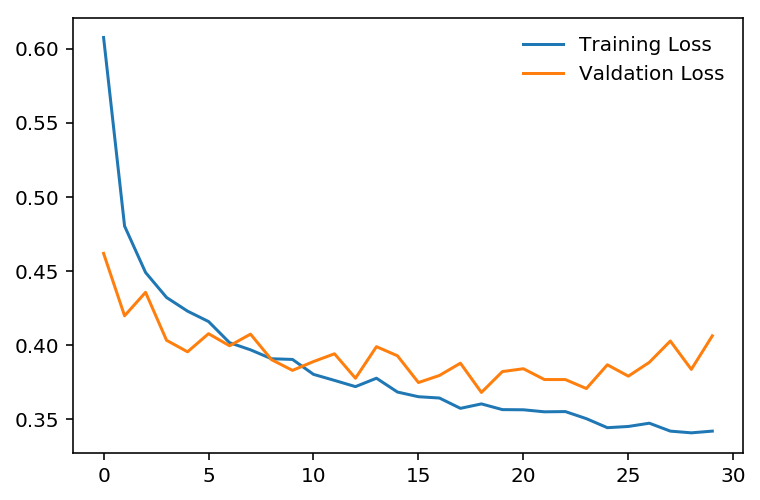

In [31]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Valdation Loss')
plt.legend(frameon=False)

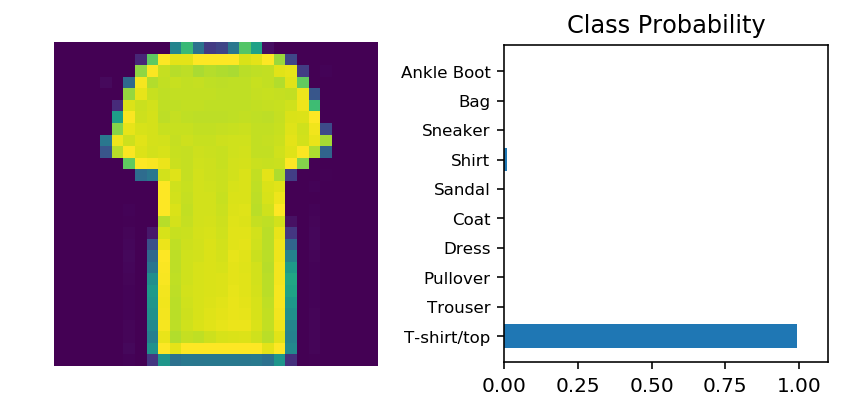

In [34]:
image,labels=next(iter(trainloader))
img=image[1].view(1,784)
with torch.no_grad():
    logits=model.forward(img)
ps=F.softmax(logits,dim=1)
helper.view_classify(img,ps,version='Fashion')